# COVID Global Clustering Scratchpad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


## Clustering thoughts
- Take case + death counts
- Trending pattern (?  what is a good single value metric.. rolling 3 day or some momentum value?)
- Adding population data
- Population density ?
- Median age and age distributions

Attempt to cluster the countries ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Turkey,Iran,Belgium,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-14,607670,172541,162488,131361,131359,94845,83306,65111,74877,31119,...,9,8,2,7,6,5,5,4,4,1
2020-04-15,636350,177644,165155,134582,134753,99483,83356,69392,76389,33573,...,9,8,2,7,6,5,5,4,4,1
2020-04-16,667801,184948,168941,147091,137698,104145,83403,74193,77995,34809,...,9,8,7,7,6,5,5,4,4,1
2020-04-17,699706,190839,172434,149130,141397,109769,83760,78546,79494,36138,...,9,8,7,7,6,5,5,4,4,1
2020-04-18,732197,191726,175925,149149,143342,115314,83787,82329,80868,37183,...,9,8,7,7,6,5,5,4,4,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Turkey,Iran,Belgium,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,28680.0,5103.0,2667.0,3221.0,3394.0,4638.0,50.0,4281.0,1512.0,2454.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,31451.0,7304.0,3786.0,12509.0,2945.0,4662.0,47.0,4801.0,1606.0,1236.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,31905.0,5891.0,3493.0,2039.0,3699.0,5624.0,357.0,4353.0,1499.0,1329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,32491.0,887.0,3491.0,19.0,1945.0,5545.0,27.0,3783.0,1374.0,1045.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Central African Republic,Saint Lucia,Chad,Saint Vincent and the Grenadines,South Sudan,Sao Tome and Principe,Dominica,Equatorial Guinea,Eritrea,Seychelles
2020-04-14,25831,21067,18056,15748,12129,4157,4683,3345,3294,2955,...,0,0,0,0,0,0,0,0,0,0
2020-04-15,28325,21645,18708,17188,12894,4440,4777,3346,3804,3145,...,0,0,0,0,0,0,0,0,0,0
2020-04-16,32916,22170,19315,17941,13759,4857,4869,3346,4052,3327,...,0,0,0,0,0,0,0,0,0,0
2020-04-17,36773,22745,20002,18703,14607,5163,4958,4636,4352,3471,...,0,0,0,0,0,0,0,0,0,0
2020-04-18,38664,23227,20043,19345,15498,5453,5031,4636,4459,3613,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Central African Republic,Saint Lucia,Chad,Saint Vincent and the Grenadines,South Sudan,Sao Tome and Principe,Dominica,Equatorial Guinea,Eritrea,Seychelles
2020-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-15,2494.0,578.0,652.0,1440.0,765.0,283.0,94.0,1.0,510.0,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,4591.0,525.0,607.0,753.0,865.0,417.0,92.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,3857.0,575.0,687.0,762.0,848.0,306.0,89.0,1290.0,300.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,1891.0,482.0,41.0,642.0,891.0,290.0,73.0,0.0,107.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Global Population Comparisons

In [2]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.sort_values(by=['Value'], ascending=False).head(), dfc_g.tail(1).transpose().count())  #262 countries / n countries
df_gmerged = pd.merge(left=dfc_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gpop_2016, on='Country/Region').rename(columns={'Value':'Population'})
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Cases" })

display(df_gmerged.rename(columns={'US':'United States'}).sort_values(by=['Population'], ascending=False).head())

df_gmerged = pd.merge(left=dfd_g.rename(columns={'US':'United States'}).tail(1).transpose(), right=df_gmerged, on='Country/Region')
df_gmerged = df_gmerged.rename(columns={ df_gmerged.columns[1]: "Deaths" })
       
display(df_gmerged.sort_values(by=['Population'], ascending=False).head(), df_gmerged.tail(1).transpose().count())



,Country/Region,Country Code,Year,Value
2711,World,WLD,2016,7426103221
1000,IDA & IBRD total,IBT,2016,6256138021
1531,Low & middle income,LMY,2016,6227752871
1885,Middle income,MIC,2016,5557635482
941,IBRD only,IBD,2016,4687686335


2020-04-18    185
dtype: int64

,Country/Region,Cases,Country Code,Year,Population
6,China,83787,CHN,2016,1378665000
14,India,15722,IND,2016,1324509589
0,United States,732197,USA,2016,322941311
32,Indonesia,6248,IDN,2016,261554226
9,Brazil,36658,BRA,2016,206163058


,Country/Region,Deaths,Cases,Country Code,Year,Population
6,China,4636,83787,CHN,2016,1378665000
18,India,521,15722,IND,2016,1324509589
0,United States,38664,732197,USA,2016,322941311
17,Indonesia,535,6248,IDN,2016,261554226
9,Brazil,2354,36658,BRA,2016,206163058


158    6
dtype: int64

## Add Population Density from worldbank

In [3]:
# population density source
# http://api.worldbank.org/v2/en/indicator/EN.POP.DNST?downloadformat=csv   
from zipfile import ZipFile
import requests, zipfile, io
import urllib.request

def get_zip(url):
    urllib.request.urlretrieve(url, "GDP.zip")
    compressed_file = zipfile.ZipFile('GDP.zip')
    files = compressed_file.namelist()
    for f in files:
        if (f.find('API') == 0):
            csv_file = compressed_file.open(f)  # pattern match how?
            return pd.read_csv(csv_file, header=2)
    return None

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def add_metric(indicator, colname, dfm, year='2019', debug=True):
    dfnew = get_zip('http://api.worldbank.org/v2/en/indicator/'+indicator+'?downloadformat=csv')
    dfnew = dfnew.fillna(method='ffill', axis=1)[['Country Code', year]].rename(columns={year:colname})

    dfm = pd.merge(left=dfm , right=dfnew, on ='Country Code') 
    display(dfm[dfm['Country/Region'].isin(['Dominica','Japan'])].head()) if debug else None

    dfm[colname] = dfm[colname].astype(str).apply(lambda x: float(x) if isfloat(x) else 0.0).round(2)
    return dfm


## Add demographics from worldbank

In [4]:
#  -- all available https://data.worldbank.org/indicator
#  API docs https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures
#
#   Examples:
# unemployment data http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# hospital beds http://api.worldbank.org/v2/en/indicator/SH.MED.BEDS.ZS?downloadformat=csv
# air flights http://api.worldbank.org/v2/en/indicator/IS.AIR.DPRT?downloadformat=csv
# rail lines http://api.worldbank.org/v2/en/indicator/IS.RRS.TOTL.KM?downloadformat=csv
# employment F http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.FE.ZS?downloadformat=csv
# employment M http://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.MA.ZS?downloadformat=csv
# unemployment http://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv
# urban pop% http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=csv
# pollution EN.ATM.PM25.MC.M3
# slum% indicator/ EN.POP.SLUM.UR.ZS

df_gmerged3 = df_gmerged.copy()  # df_gmerged2 no longer needed

df_gmerged3 = add_metric('IS.AIR.DPRT', 'flights', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.ATM.PM25.MC.M3', 'pollution', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SL.UEM.TOTL.ZS', 'unemp%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.MED.BEDS.ZS', 'hospbeds', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('IS.RRS.TOTL.KM', 'railways', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.URB.TOTL.IN.ZS', 'urbanpop%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.SLUM.UR.ZS', 'slum%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('EN.POP.DNST', 'popdensity%', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('NY.GDP.PCAP.PP.CD', 'GDP/cap', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SE.ADT.LITR.ZS', 'literacy', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('FR.INR.DPST', 'deposit rate', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.DTH.COMM.ZS', 'COD disease', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SH.IMM.IDPT', 'DTP immunized', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('SP.POP.65UP.TO.ZS', 'pop% >= 65', df_gmerged3, year='2019', debug=False)
df_gmerged3 = add_metric('TG.VAL.TOTL.GD.ZS', 'trade%', df_gmerged3, year='2019', debug=False)


df_gmerged3 = df_gmerged3.sort_values(by='Cases', ascending=False).drop(columns=['Year'])

df_x = pd.concat([df_gmerged3.head(0), df_gmerged3[df_gmerged3['Country/Region'].isin(['Japan','Brazil','India'])]], axis=0)

display(df_gmerged3.shape, df_x[['Country/Region','Cases','flights','railways','hospbeds','popdensity%','pop% >= 65','pollution','GDP/cap','COD disease','urbanpop%','unemp%']].transpose())


(159, 20)

,9,18,27
Country/Region,Brazil,India,Japan
Cases,36658,15722,10296
flights,832683,1.20011e+06,999594
railways,32622,68443,16851.7
hospbeds,2.2,0.7,13.4
popdensity%,25.06,454.94,347.07
pop% >= 65,8.92,6.18,27.58
pollution,12.71,90.87,11.7
GDP/cap,16096.4,7762.88,42797.5
COD disease,13.9,26,12.7


In [5]:
display(df_gmerged3.shape, df_x[['Country/Region','Cases','flights','railways','hospbeds','popdensity%','pop% >= 65','pollution','GDP/cap','COD disease','urbanpop%','unemp%']].transpose())


(159, 20)

,9,18,27
Country/Region,Brazil,India,Japan
Cases,36658,15722,10296
flights,832683,1.20011e+06,999594
railways,32622,68443,16851.7
hospbeds,2.2,0.7,13.4
popdensity%,25.06,454.94,347.07
pop% >= 65,8.92,6.18,27.58
pollution,12.71,90.87,11.7
GDP/cap,16096.4,7762.88,42797.5
COD disease,13.9,26,12.7


In [6]:
# df_gmerged4 ready to go
df_gmerged4 = df_gmerged3.copy()
df_gmerged4[df_gmerged4['Country/Region'].isin(['Belarus','Poland','Spain','France','Sweden','India','Korea, South','Japan','United States','South Africa'])].transpose()


,0,2,3,18,11,27,25,55,50
Country/Region,United States,Spain,France,India,Sweden,Japan,Poland,Belarus,South Africa
Deaths,38664,20043,19345,521,1511,222,347,45,52
Cases,732197,191726,149149,15722,13822,10296,8742,4779,3034
Country Code,USA,ESP,FRA,IND,SWE,JPN,POL,BLR,ZAF
Population,322941311,46484062,66721256,1324509589,9923085,126994511,37970087,9501534,56203654
flights,9.87963e+06,641020,597412,1.20011e+06,190315,999594,123903,31676,180317
pollution,7.41,9.7,11.81,90.87,6.18,11.7,20.88,18.77,25.1
unemp%,3.68,13.96,8.43,5.36,6.48,2.29,3.47,4.59,28.18
hospbeds,2.9,3,6.5,0.7,2.6,13.4,6.5,11,2.8
railways,150462,15618,28241,68443,9708,16851.7,18536,5459,20953


# Correlation Matrix

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Deaths,1.000000,0.916592,0.180786,0.708174,-0.156732,0.020812,0.088312,0.690539,0.180048,-0.179403,-0.025756,0.248483,-0.198862,-0.118936,-0.161356,0.091262,0.310722,-0.076679
Cases,0.916592,1.000000,0.226039,0.877728,-0.129420,-0.011756,0.081516,0.823772,0.165759,-0.162459,-0.024583,0.247677,-0.203952,-0.089238,-0.151631,0.083817,0.252883,-0.089975
Population,0.180786,0.226039,1.000000,0.503798,0.267416,-0.049807,-0.036975,0.612453,-0.060774,0.009955,-0.017312,-0.042647,0.024591,-0.026367,-0.018070,0.029798,0.010736,-0.141224
flights,0.708174,0.877728,0.503798,1.000000,-0.055782,-0.070206,0.057644,0.910928,0.141160,-0.138750,-0.024821,0.222829,-0.182516,-0.089135,-0.146960,0.089789,0.181807,-0.101634
pollution,-0.156732,-0.129420,0.267416,-0.055782,1.000000,0.034698,-0.385119,-0.033383,-0.230348,0.477390,-0.100991,-0.172031,0.132855,0.111566,0.416183,-0.111487,-0.466812,-0.100274
unemp%,0.020812,-0.011756,-0.049807,-0.070206,0.034698,1.000000,-0.002011,-0.011623,0.120080,0.026280,-0.125099,-0.148474,0.237484,0.130979,0.009034,-0.098822,0.062347,-0.019466
hospbeds,0.088312,0.081516,-0.036975,0.057644,-0.385119,-0.002011,1.000000,0.138858,0.388271,-0.565877,0.332303,0.305930,-0.010130,-0.163978,-0.513351,0.295807,0.601188,0.223852
railways,0.690539,0.823772,0.612453,0.910928,-0.033383,-0.011623,0.138858,1.000000,0.142949,-0.172386,-0.042580,0.182165,-0.167972,-0.069401,-0.162519,0.078569,0.251617,-0.128805
urbanpop%,0.180048,0.165759,-0.060774,0.141160,-0.230348,0.120080,0.388271,0.142949,1.000000,-0.478795,0.181979,0.606855,-0.022595,-0.110195,-0.532877,0.334991,0.408456,0.181994
slum%,-0.179403,-0.162459,0.009955,-0.138750,0.477390,0.026280,-0.565877,-0.172386,-0.478795,1.000000,-0.113728,-0.551982,-0.078594,0.289491,0.799900,-0.276597,-0.605509,-0.244386


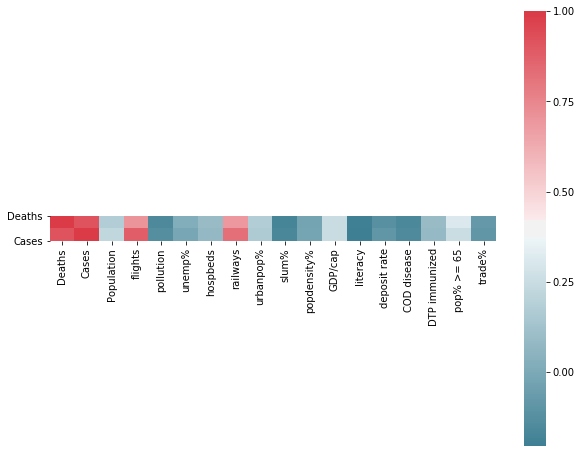

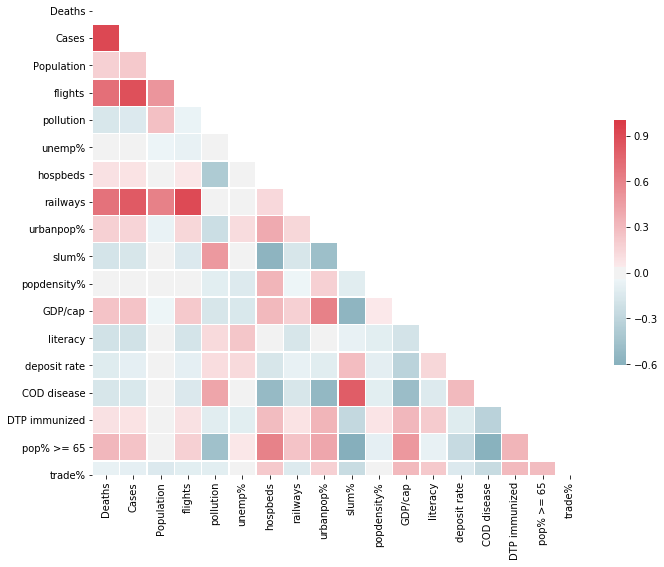

In [7]:
import seaborn as sns

df_corr = df_gmerged4.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr.iloc[0:2,:], mask=np.zeros_like(df_corr.iloc[0:2,:], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_corr


## Scaling / Normalization

In [8]:
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
scaler = StandardScaler()

df_sc = df_gmerged4.copy().set_index('Country/Region').drop(columns=['Country Code'])
display('orig',df_sc.head(2))

df_sc = pd.DataFrame(scaler.fit_transform(df_sc), index=df_sc.index, columns=df_sc.columns)
display('scale',df_sc.head(2))

# df_sc = pd.DataFrame(scaler.inverse_transform(df_sc), index=df_sc.index, columns=df_sc.columns)
# display('inverse',df_sc.head(2))

'orig'

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
United States,38664,732197,322941311,9879630.0,7.41,3.68,2.9,150462.3,82.26,0.0,35.77,62794.59,0.00,0.0,5.2,94.0,15.81,20.83
Spain,20043,191726,46484062,641020.0,9.70,13.96,3.0,15618.0,80.32,0.0,93.53,39715.44,98.44,0.0,5.1,93.0,19.38,51.67


'scale'

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
United States,8.671486,11.216454,1.809402,10.876939,-1.012400,-0.533644,0.018517,9.518885,0.955201,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848
Spain,4.388304,2.779336,0.026889,0.472386,-0.894881,1.370712,0.060101,0.686980,0.871687,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125


# Misc Clustering Techniques

## - KMeans

In [101]:
from sklearn.model_selection import train_test_split

df_gm5 = df_sc.copy()
df_train,df_test = train_test_split(df_gm5,test_size=0.2)

display('train',df_train.shape, df_train.head(3))
display('test',df_test.shape, df_test.head(3))

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_train) # train on sample rows

display(f'kmeans info - inertia: {kmeans.inertia_}, iters: {kmeans.n_iter_}')    # training info 
display(f'labels: {kmeans.labels_}')                       # k-labels
#display('k centers', kmeans.cluster_centers_)                           # k-centers
#display(f'kmeans.predict x2: {kmeans.predict(df_test)}')  # evaluate 2 arb points
display(f'score {kmeans.score(df_test)}') # score
#display(f'transform: {kmeans.transform(df_test)}')  # what does this do, distance of each pt ?

def fl_col(df):
    return pd.concat([df.iloc[:,0:3],df.iloc[:,-2:]], axis=1)
    
df_train.insert(0, 'cluster', kmeans.labels_)
df_test.insert(0, 'cluster', kmeans.predict(df_test))
display('train',(df_train).head())
display('test',(df_test).head())
display(df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])])

display(df_train[['cluster','Cases']].groupby(by=['cluster']).count())
display(df_test[['cluster','Cases']].groupby(by=['cluster']).count())


'train'

(127, 18)

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
Denmark,-0.142379,-0.097540,-0.235894,-0.137366,-0.877946,-0.305788,-0.147820,-0.196378,1.196702,-0.882278,-0.121272,1.501300,-1.967469,-0.814337,-0.710447,0.573418,1.679317,-0.052194
Burkina Faso,-0.213685,-0.204817,-0.152600,-0.244724,0.810945,-0.055703,-1.021087,-0.302025,-1.322054,1.441339,-0.161314,-0.857786,-0.809092,0.658208,1.677676,0.238837,-0.953782,-0.211186
Poland,-0.142149,-0.077168,-0.028007,-0.109993,-0.321141,-0.572546,1.515545,0.878101,-0.000471,-0.882278,-0.129800,0.431989,0.807353,-0.814337,-0.782378,0.461891,1.332777,0.797424


'test'

(32, 18)

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,
Kenya,-0.219205,-0.209547,0.043444,-0.094565,0.074012,-0.726303,-0.605245,-0.210395,-1.422356,1.095268,-0.150307,-0.792634,0.323712,1.066618,2.013355,0.294600,-0.964375,-0.962857
Seychelles,-0.221965,-0.213465,-0.272216,-0.228506,-0.357064,-1.215359,0.309606,-0.335953,-0.145544,-0.882278,-0.077341,0.397736,0.726699,-0.067854,-0.451494,0.684946,-0.169906,1.540493
Nepal,-0.221965,-0.213153,-0.097055,-0.168550,3.725320,-0.954159,-1.062671,-0.335953,-1.736179,1.035236,-0.086099,-0.809244,-0.059041,-0.814337,0.176707,0.238837,-0.451375,-0.332996


'kmeans info - inertia: 1426.7811302271853, iters: 7'

'labels: [2 0 2 2 0 2 2 2 2 2 0 2 0 1 0 0 0 2 2 0 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2\n 0 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 0 2 2 1 2 2 0 2 2 0 0 2 0 2 0 0 2 0 2 2\n 2 0 0 2 0 0 0 0 0 2 2 2 0 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2\n 0 2 0 0 0 0 2 0 2 2 0 2 0 0 0 0]'

'score -625.7428204405643'

'train'

,cluster,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,,
Denmark,2,-0.142379,-0.097540,-0.235894,-0.137366,-0.877946,-0.305788,-0.147820,-0.196378,1.196702,-0.882278,-0.121272,1.501300,-1.967469,-0.814337,-0.710447,0.573418,1.679317,-0.052194
Burkina Faso,0,-0.213685,-0.204817,-0.152600,-0.244724,0.810945,-0.055703,-1.021087,-0.302025,-1.322054,1.441339,-0.161314,-0.857786,-0.809092,0.658208,1.677676,0.238837,-0.953782,-0.211186
Poland,2,-0.142149,-0.077168,-0.028007,-0.109993,-0.321141,-0.572546,1.515545,0.878101,-0.000471,-0.882278,-0.129800,0.431989,0.807353,-0.814337,-0.782378,0.461891,1.332777,0.797424
Latvia,2,-0.220815,-0.202522,-0.260192,-0.188317,-0.703463,-0.007538,1.224456,-0.214154,0.347359,-0.882278,-0.186362,0.386652,0.839671,-0.814337,-0.892673,0.517655,1.714122,1.114574
Philippines,0,-0.130648,-0.118615,0.395567,0.079825,-0.465345,-0.817075,-0.771582,-0.302615,-0.566556,0.470223,0.012213,-0.551676,0.791616,-0.106426,0.186298,-1.211018,-0.543685,-0.171785


'test'

,cluster,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,,
Kenya,0,-0.219205,-0.209547,0.043444,-0.094565,0.074012,-0.726303,-0.605245,-0.210395,-1.422356,1.095268,-0.150307,-0.792634,0.323712,1.066618,2.013355,0.294600,-0.964375,-0.962857
Seychelles,2,-0.221965,-0.213465,-0.272216,-0.228506,-0.357064,-1.215359,0.309606,-0.335953,-0.145544,-0.882278,-0.077341,0.397736,0.726699,-0.067854,-0.451494,0.684946,-0.169906,1.540493
Nepal,0,-0.221965,-0.213153,-0.097055,-0.168550,3.725320,-0.954159,-1.062671,-0.335953,-1.736179,1.035236,-0.086099,-0.809244,-0.059041,-0.814337,0.176707,0.238837,-0.451375,-0.332996
Estonia,2,-0.213225,-0.190034,-0.264343,-0.248644,-1.047297,-0.268739,0.891783,-0.268294,0.379215,-0.882278,-0.186720,0.635757,0.839671,-0.814337,-0.887878,0.294600,1.652078,1.562969
Mauritania,0,-0.221735,-0.213528,-0.245981,-0.243185,1.040851,0.553765,-1.021087,-0.288271,-0.275550,1.939257,-0.202596,-0.762603,-0.463996,0.472155,1.538608,-0.318800,-0.843313,0.690043


,cluster,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%
Country/Region,,,,,,,,,,,,,,,,,,,
Poland,2,-0.142149,-0.077168,-0.028007,-0.109993,-0.321141,-0.572546,1.515545,0.878101,-0.000471,-0.882278,-0.129800,0.431989,0.807353,-0.814337,-0.782378,0.461891,1.332777,0.797424
China,1,0.844402,1.094335,8.616390,5.034622,1.309760,-0.415085,0.559110,4.086081,-0.039645,0.007618,-0.115024,-0.143651,0.753958,-0.473995,-0.839924,0.684946,0.334015,-0.757250
Japan,2,-0.170901,-0.052909,0.545996,0.876213,-0.792244,-0.791140,4.384850,0.767784,1.358133,-0.882278,0.005758,0.935603,-1.967469,-0.741731,-0.413131,0.684946,2.855132,-0.869904
Spain,2,4.388304,2.779336,0.026889,0.472386,-0.894881,1.370712,0.060101,0.686980,0.871687,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125
India,1,-0.102126,0.031794,8.267212,1.102036,3.270638,-0.222427,-0.896334,4.146863,-1.121018,-0.034758,0.071322,-0.603889,0.122500,-0.814337,0.224661,0.127309,-0.383277,-0.846318


,Cases
cluster,
0,50
1,2
2,75


,Cases
cluster,
0,14
1,1
2,17


## DBSCAN

I saw a presentation by Healy & McInnes on Youtube that basically said KMeans sucks, and we should use DBScan or their upgraded version HDBScan.   https://www.youtube.com/watch?v=ayZQj4llUSU&t=1824s


In [102]:
from sklearn.cluster import DBSCAN
import numpy as np

df_train = df_gm5
clustering = DBSCAN(eps=3, min_samples=2).fit(df_train)
components = clustering.components_
labels =clustering.labels_
core_sample_indices = clustering.core_sample_indices_
display(f'model: {clustering}')
display(labels[0:10])

display(f'core_sample_indices_[0:10]: {core_sample_indices[0:10]}')
display(f'components_[0]: {components[0]}')    
display(f'labels/fit_predict[0:10]: {labels[0:10]}')                       

def fl_col(df):
    return pd.concat([df.iloc[:,0:3],df.iloc[:,-2:]], axis=1)
    
df_train['cluster'] = clustering.labels_
display('train2',pd.concat([fl_col(df_train).head(), 
                            fl_col(df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])])]))


"model: DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',\n       metric_params=None, min_samples=2, n_jobs=None, p=None)"

array([-1,  0,  0,  1, -1,  1, -1,  2,  3,  3], dtype=int64)

'core_sample_indices_[0:10]: [ 1  2  3  5  7  8  9 10 11 12]'

'components_[0]: [ 4.38830368  2.77933577  0.02688869  0.47238554 -0.89488095  1.37071175\n  0.06010084  0.68698041  0.87168744 -0.88227803 -0.1483439   0.80017278\n  0.79892219 -0.81433719 -0.77758298  0.35036395  1.61424593 -0.26612507]'

'labels/fit_predict[0:10]: [-1  0  0  1 -1  1 -1  2  3  3]'

'train2'

,Deaths,Cases,Population,trade%,cluster
Country/Region,,,,,
United States,8.671486,11.216454,1.809402,-1.121848,-1
Spain,4.388304,2.779336,0.026889,-0.266125,0
Italy,5.120684,2.532671,0.118081,-0.305249,0
France,4.227750,2.114680,0.157372,-0.446759,1
Germany,0.803689,2.024029,0.258133,0.301027,-1
United States,8.671486,11.216454,1.809402,-1.121848,-1
Spain,4.388304,2.779336,0.026889,-0.266125,0
Italy,5.120684,2.532671,0.118081,-0.305249,0
China,0.844402,1.094335,8.616390,-0.757250,-1


## Dimension Reduction

Most research tells us due to "Curse of Dimensionality" that you need to reduce dims before you run clustering, so I have this backwards..  will redo after we apply PCA and/or T-SNE.


In [12]:
# method copied from kaggle: https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

plotX = df_train.copy()

pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)

PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX["dummy"] = 0
cluster0 = plotX[plotX["cluster"] == 0]
cluster1 = plotX[plotX["cluster"] == 1]
cluster2 = plotX[plotX["cluster"] == 2]


cluster2.head()


,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,...,pop% >= 65,trade%,cluster,PC1_1d,PC1_2d,PC2_2d,PC1_3d,PC2_3d,PC3_3d,dummy
Country/Region,,,,,,,,,,,,,,,,,,,,,
Barbados,-0.220815,-0.212466,-0.270984,-0.248745,-0.208240,0.698259,1.224456,-0.335953,-1.244997,-0.882278,...,1.072493,-0.604918,2,-1.074543,-1.074543,-0.166616,-1.074543,-0.166616,-0.315102,0
Colombia,-0.186772,-0.159952,0.037768,0.154601,-0.544376,0.583405,-0.563661,-0.335953,0.891490,-0.419673,...,-0.035224,-0.919848,2,-0.395942,-0.395942,0.033339,-0.395942,0.033339,-0.657520,0
Grenada,-0.221965,-0.213418,-0.272116,-0.249533,-0.226715,-1.215359,0.351190,-0.335953,-1.024590,-0.670398,...,0.137289,-0.548591,2,-0.346801,-0.346801,-0.331724,-0.346801,-0.331724,0.281922,0
New Zealand,-0.219435,-0.191439,-0.242566,-0.037975,-1.086812,-0.461397,-0.023067,-0.079990,1.139448,-0.882278,...,1.049794,-0.569124,2,-1.927439,-1.927439,-0.412579,-1.927439,-0.412579,1.786860,0
Canada,0.099831,0.322668,-0.040003,1.411687,-1.062692,-0.185377,-0.064652,2.787432,0.918610,-0.882278,...,1.288892,-0.211741,2,-2.504237,-2.504237,1.547160,-2.504237,1.547160,2.209163,0


## Alt Plotting

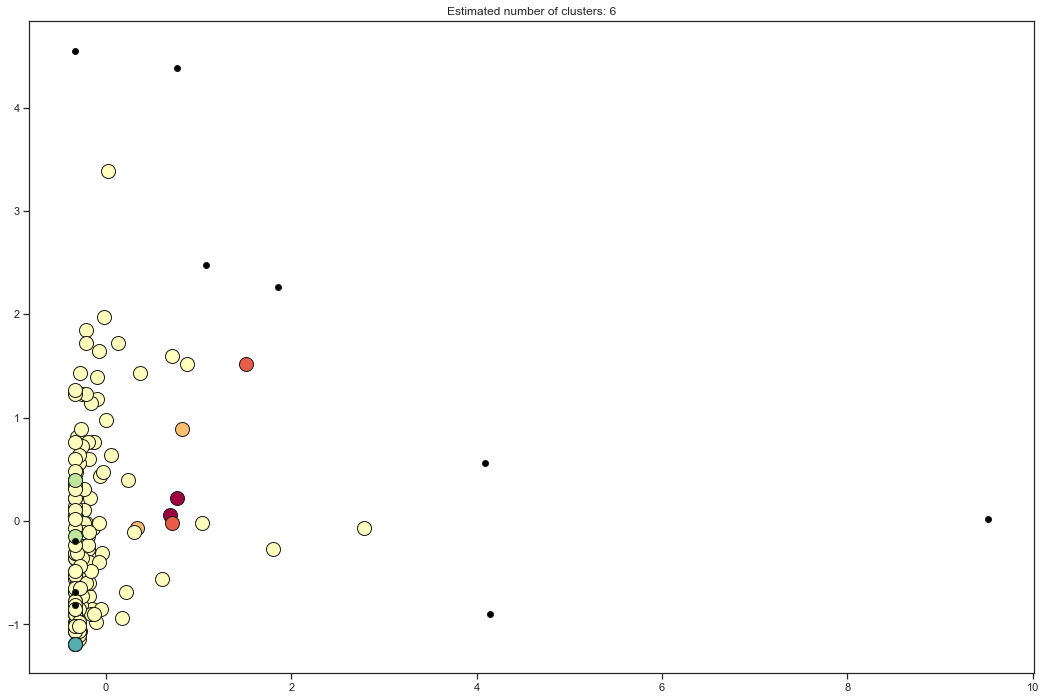

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,popdensity%,GDP/cap,literacy,deposit rate,COD disease,DTP immunized,pop% >= 65,trade%,cluster
Country/Region,,,,,,,,,,,,,,,,,,,
United States,8.671486,11.216454,1.809402,10.876939,-1.012400,-0.533644,0.018517,9.518885,0.955201,-0.882278,-0.183451,1.814318,-1.967469,-0.814337,-0.772788,0.406128,1.074007,-1.121848,-1
Spain,4.388304,2.779336,0.026889,0.472386,-0.894881,1.370712,0.060101,0.686980,0.871687,-0.882278,-0.148344,0.800173,0.798922,-0.814337,-0.777583,0.350364,1.614246,-0.266125,0
Italy,5.120684,2.532671,0.118081,0.039446,-0.533086,0.616750,0.226437,0.763632,0.446370,-0.882278,-0.080319,0.893110,0.819156,-0.814337,-0.787174,0.461891,2.124220,-0.305249,0
China,0.844402,1.094335,8.616390,5.034622,1.309760,-0.415085,0.559110,4.086081,-0.039645,0.007618,-0.115024,-0.143651,0.753958,-0.473995,-0.839924,0.684946,0.334015,-0.757250,-1
India,-0.102126,0.031794,8.267212,1.102036,3.270638,-0.222427,-0.896334,4.146863,-1.121018,-0.034758,0.071322,-0.603889,0.122500,-0.814337,0.224661,0.127309,-0.383277,-0.846318,-1
Japan,-0.170901,-0.052909,0.545996,0.876213,-0.792244,-0.791140,4.384850,0.767784,1.358133,-0.882278,0.005758,0.935603,-1.967469,-0.741731,-0.413131,0.684946,2.855132,-0.869904,-1
Poland,-0.142149,-0.077168,-0.028007,-0.109993,-0.321141,-0.572546,1.515545,0.878101,-0.000471,-0.882278,-0.129800,0.431989,0.807353,-0.814337,-0.782378,0.461891,1.332777,0.797424,3


In [76]:
# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[core_sample_indices] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(18,12))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df_train[class_member_mask & core_samples_mask]
    plt.plot(xy['railways'], xy['hospbeds'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, figure=fig)

    xy = df_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy['railways'], xy['hospbeds'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, figure=fig)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

display((df_train[df_train.index.isin(['China','Japan','United States','Italy','Spain','India','Poland'])]))



In [14]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = cluster0.index)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = cluster1.index)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = cluster2.index)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [15]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = cluster0.index)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = cluster1.index)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = cluster2.index)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


## T-Distributed Stochastic Neighbor Embedding (T-SNE)

In [16]:
plotX = df_train.copy()
perplexity = 50

tsne_1d = TSNE(n_components=1, perplexity=perplexity)
tsne_2d = TSNE(n_components=2, perplexity=perplexity)
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)

TCs_1d.columns = ["TC1_1d"]
PCs_1d.columns = ["PC1_1d"]
TCs_2d.columns = ["TC1_2d","TC2_2d"]
TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')
plotX["dummy"] = 0

cluster0 = plotX[plotX["cluster"] == 0]
cluster1 = plotX[plotX["cluster"] == 1]
cluster2 = plotX[plotX["cluster"] == 2]

cluster2.head()

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,...,pop% >= 65,trade%,cluster,TC1_1d,TC1_2d,TC2_2d,TC1_3d,TC2_3d,TC3_3d,dummy
Country/Region,,,,,,,,,,,,,,,,,,,,,
Barbados,-0.220815,-0.212466,-0.270984,-0.248745,-0.208240,0.698259,1.224456,-0.335953,-1.244997,-0.882278,...,1.072493,-0.604918,2,-9.023979,-0.990562,0.841882,-80.895805,49.575336,5.172048,0
Colombia,-0.186772,-0.159952,0.037768,0.154601,-0.544376,0.583405,-0.563661,-0.335953,0.891490,-0.419673,...,-0.035224,-0.919848,2,-8.145858,-2.743311,0.205821,19.696684,23.585077,181.404510,0
Grenada,-0.221965,-0.213418,-0.272116,-0.249533,-0.226715,-1.215359,0.351190,-0.335953,-1.024590,-0.670398,...,0.137289,-0.548591,2,-8.374548,-2.098660,0.503466,-138.949493,14.092985,-100.514122,0
New Zealand,-0.219435,-0.191439,-0.242566,-0.037975,-1.086812,-0.461397,-0.023067,-0.079990,1.139448,-0.882278,...,1.049794,-0.569124,2,-4.302923,0.645895,2.382424,18.901241,-96.875618,-37.822323,0
Canada,0.099831,0.322668,-0.040003,1.411687,-1.062692,-0.185377,-0.064652,2.787432,0.918610,-0.882278,...,1.288892,-0.211741,2,-10.866353,1.252712,2.529962,-83.291824,-172.723679,-30.094980,0


In [18]:
def make_scat(cid, rgb_color, cluster):
    return go.Scatter(
                x = cluster["TC1_2d"],
                y = cluster["TC2_2d"],
                mode = "markers",
                name = "Cluster: "+str(cid),
                marker =rgb_color,
                text = cluster.index)
    

data = [
    make_scat(0, dict(color = 'rgba(255, 128, 255, 0.8)'), cluster0),
    make_scat(1, dict(color ='rgba(255, 128, 2, 0.8)'), cluster1),
    make_scat(2, dict(color ='rgba(0, 255, 200, 0.8)'), cluster2),
]

#data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## Tuning the Perplexity level in 2D?



pandas.core.frame.DataFrame

,Deaths,Cases,Population,flights,pollution,unemp%,hospbeds,railways,urbanpop%,slum%,...,pop% >= 65,trade%,cluster,TC1_1d,TC1_2d,TC2_2d,TC1_3d,TC2_3d,TC3_3d,dummy
Country/Region,,,,,,,,,,,,,,,,,,,,,
Barbados,-0.220815,-0.212466,-0.270984,-0.248745,-0.208240,0.698259,1.224456,-0.335953,-1.244997,-0.882278,...,1.072493,-0.604918,2,-0.552918,1.759773,-2.692564,-24.383293,111.538467,63.992722,0
Colombia,-0.186772,-0.159952,0.037768,0.154601,-0.544376,0.583405,-0.563661,-0.335953,0.891490,-0.419673,...,-0.035224,-0.919848,2,-1.486201,0.279921,-1.519649,155.384109,34.612221,-6.866547,0
Nepal,-0.221965,-0.213153,-0.097055,-0.168550,3.725320,-0.954159,-1.062671,-0.335953,-1.736179,1.035236,...,-0.451375,-0.332996,1,-4.571540,-0.264263,3.906142,-78.772499,-131.528427,114.439049,0


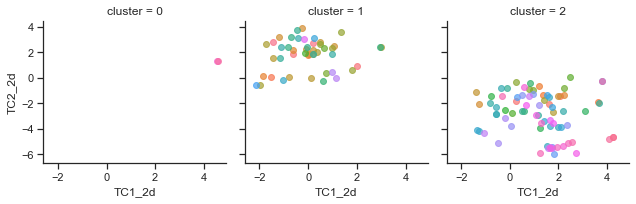

In [20]:
plotX = df_train.copy()

def build_sets(perplexity, plotX):
    tsne_1d = TSNE(n_components=1, perplexity=perplexity)
    tsne_2d = TSNE(n_components=2, perplexity=perplexity)
    tsne_3d = TSNE(n_components=3, perplexity=perplexity)

    TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
    TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)
    TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["cluster"], axis=1)), index=plotX.index)

    TCs_1d.columns = ["TC1_1d"]
    PCs_1d.columns = ["PC1_1d"]
    TCs_2d.columns = ["TC1_2d","TC2_2d"]
    TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

    plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')
    plotX["dummy"] = 0

    cluster0 = plotX[plotX["cluster"] == 0]
    cluster1 = plotX[plotX["cluster"] == 1]
    cluster2 = plotX[plotX["cluster"] == 2]
    
    display(type(cluster0))
    return cluster0,cluster1,cluster2, plotX

# init_notebook_mode(connected=True)
# fig,ax = plt.subplots(1,4,figsize=(8, 12)) 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

c0,c1,c2, plotX2 = build_sets(50,plotX)    

display(plotX2.head(3))

g = sns.FacetGrid(plotX2, col="cluster", hue="Cases")
g.map(plt.scatter, "TC1_2d", "TC2_2d", alpha=.7)

# # for i in [10,20,30, 40,50,60, 70,80,90]:
# for i in [10, 40]:
#     c0,c1,c2,X2 = build_sets(i,plotX)    

#     display(c0.head(3))
#     display(c1.head(3))
# #     ax[0].scatter(c0['TC1_2d'], c0['TC2_2d'])



## Need to figure out do I keep causes & deaths as indicators ?  Weigh them?  Add a cases/trending 3,7,14 day rolling avg?

# Pop Density vs Case counts

In [ ]:
max_ctys = 30
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged2[df_gmerged2['Cases'] > 1000].sort_values(by=['popdensity'],ascending=False).head(max_ctys)

ax1.set_xlabel('Cases')  
ax1.set_xscale('linear')
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Cases'], color='xkcd:green')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,'density: '+str(df_gmerged_h['popdensity'].iloc[n:n+1].round(2).item()) + ', pop: '+str(df_gmerged_h['Population'].iloc[n:n+1].div(1000000).round(0).item()) +'M, '+str(df_gmerged_h['% of pop'].iloc[n:n+1].round(2).item())  +'%', color='xkcd:blue')

# ax2 = ax1.twiny()
# ax2.set_xscale('linear')
# ax2.set(xlim=[0, 10])   # get max min +/- buffer
# ax2.set_xlabel('Population density', color='xkcd:red')  
# ax2.spines['top'].set_color('red')
# ax2.tick_params(axis='x', colors='red')
# ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['popdensity'], color='xkcd:red')
# for n,i in enumerate(ax2.patches):
#     ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['popdensity'].iloc[n:n+1].item()), color='xkcd:red')

plt.title('Top Population Density Countries > 1000 cases')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# read from JSON directly WIP -- would be more optimal than above but scrap for now
# EN.ATM.PM25.MC.M3 - polution
# able to aggrecate and get last value, not sure what source= is    ?source=2&format=json&mrnev=1&per_page=500
#   http://api.worldbank.org/v2/country/all/indicator/EN.ATM.PM25.MC.M3;SH.MED.BEDS.ZS;IS.AIR.DPRT;IS.RRS.TOTL.KM;SP.URB.TOTL.IN.ZS;SP.POP.TOTL;SL.UEM.TOTL.ZS?source=2&format=json&mrnev=1&per_page=5000
#jurl = 'http://api.worldbank.org/v2/country/all/indicator/EN.ATM.PM25.MC.M3;SH.MED.BEDS.ZS;IS.AIR.DPRT;IS.RRS.TOTL.KM;SP.URB.TOTL.IN.ZS;SP.POP.TOTL;SL.UEM.TOTL.ZS?source=2&format=json&mrnev=1&per_page=5000'
    
#r = requests.get(jurl)
#display(r.text)
#    
#pd.read_json(r.text)

